In [36]:
import numpy as np

In [37]:
# Fresnel visualization
m_salinity_factor = 0.00017492711

def friedman_sverdrup_salinity(chlorinity):
    return 0.03 + 1.805 * chlorinity

def comp_chi(theta_i, theta_o, phi):
    cos_two_chi = np.cos(theta_o) * np.cos(theta_i) + np.sin(theta_o) * np.sin(theta_i) * np.cos(phi)
    return np.arccos(cos_two_chi) / 2

def u_sqr(a_1, a_2):
    return np.abs(a_1 + a_2) / 2.0

def v_sqr(a_1, a_2):
    return np.abs(-a_1 + a_2) / 2.0

def a_1(n_real_sqr, n_cplx_sqr, chi):
    return np.abs(n_real_sqr - n_cplx_sqr - np.square(np.sin(chi)))

def a_2(n_real_sqr, n_cplx_sqr, chi):
    t_1 = (n_real_sqr - n_cplx_sqr - np.square(np.sin(chi)))
    t_2 = 4.0 * n_real_sqr * n_cplx_sqr
    return np.sqrt(np.square(t_1) + t_2)

def b_1(n_real_sqr, n_cplx_sqr, chi):
    return (n_real_sqr - n_cplx_sqr) * np.cos(chi)

def b_2(n_real, n_cplx, chi):
    return 2.0 * (n_real + n_cplx) * np.cos(chi)

def fresnel(theta_i, theta_o, phi_i, phi_o, n_real, n_cplx, chlorinity):
    phi_rel = phi_i - phi_o
    chi = comp_chi(theta_i, theta_o, phi_rel)
    cos_chi = np.cos(chi)

    salinity = friedman_sverdrup_salinity(chlorinity)
    n_real_corrected = n_real + m_salinity_factor * salinity
    n_real_sqr = np.square(n_real_corrected)
    n_cplx_sqr = np.square(n_cplx)

    a1 = a_1(n_real_sqr, n_cplx_sqr, chi)
    a2 = a_2(n_real_sqr, n_cplx_sqr, chi)

    b1 = b_1(n_real_sqr, n_cplx_sqr, chi)
    b2 = b_2(n_real_corrected, n_cplx, chi)

    m_u_sqr = u_sqr(a1, a2)
    m_v_sqr = v_sqr(a1, a2)

    u = np.sqrt(m_u_sqr)
    v = np.sqrt(m_v_sqr)

    left = (np.square(b1 - u) + np.square(b2 + v)) / (np.square(b1 + u) + np.square(b2 - v))
    right = (np.square(cos_chi - u) + m_v_sqr) / (np.square(cos_chi + u) + m_v_sqr)

    return 0.5 * (left + right)


In [38]:
ior_wavelengths = [ 0.200, 0.225, 0.250, 0.275, 0.300, 0.325, 0.345 ,0.375, 0.400, 0.425 ,
                    0.445, 0.475, 0.500, 0.525, 0.550, 0.575, 0.600, 0.625, 0.650, 0.675,
                    0.700, 0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925,
                    0.950, 0.975, 1.000, 1.200, 1.400, 1.600, 1.800, 2.000, 2.200, 2.400, 
                    2.600, 2.650, 2.700, 2.750, 2.800, 2.850, 2.900, 2.950, 3.000, 3.050,
                    3.100, 3.150, 3.200, 3.250, 3.300, 3.350, 3.400, 3.450, 3.500, 3.600,
                    3.700, 3.800, 3.900, 4.000 ]
ior_real_data = [   1.369, 1.373, 1.362, 1.354, 1.349, 1.346, 1.343, 1.341, 1.339, 1.338,
                    1.337, 1.336, 1.335, 1.334, 1.333, 1.333, 1.332, 1.332, 1.331, 1.331,
                    1.331, 1.330, 1.330, 1.330, 1.329, 1.329, 1.329, 1.328, 1.328, 1.328, 
                    1.327, 1.327, 1.327, 1.324, 1.321, 1.317, 1.312, 1.306, 1.296, 1.279,
                    1.242, 1.219, 1.188, 1.157, 1.142, 1.149, 1.201, 1.292, 1.371, 1.426,
                    1.467, 1.483, 1.478, 1.467, 1.450, 1.432, 1.420, 1.410, 1.400, 1.385,
                    1.374, 1.364, 1.357, 1.351 ]
ior_cplx_data = [   1.10e-07, 4.90e-08, 3.35e-08, 2.35e-08, 1.60e-08, 
                    1.08e-08, 6.50e-09, 3.50e-09, 1.86e-09, 1.30e-09, 
                    1.02e-09, 9.35e-10, 1.00e-09, 1.32e-09, 1.96e-09, 
                    3.60e-09, 1.09e-08, 1.39e-08, 1.64e-08, 2.23e-08, 
                    3.35e-08, 9.15e-08, 1.56e-07, 1.48e-07, 1.25e-07, 
                    1.82e-07, 2.93e-07, 3.91e-07, 4.86e-07, 1.06e-06, 
                    2.93e-06, 3.48e-06, 2.89e-06, 9.89e-06, 1.38e-04, 
                    8.55e-05, 1.15e-04, 1.10e-03, 2.89e-04, 9.56e-04, 
                    3.17e-03, 6.70e-03, 1.90e-02, 5.90e-02, 1.15e-01, 
                    1.85e-01, 2.68e-01, 2.98e-01, 2.72e-01, 2.40e-01, 
                    1.92e-01, 1.35e-01, 9.24e-02, 6.10e-02, 3.68e-02, 
                    2.61e-02, 1.95e-02, 1.32e-02, 9.40e-03, 5.15e-03, 
                    3.60e-03, 3.40e-03, 3.80e-03, 4.60e-03 ]

In [39]:
# Obtain test wavelengths and their IOR
wavelengths = [ 0.55, 0.66, 0.87, 1.6  ]

def ior(wavelength):
    if wavelength < ior_wavelengths[0] or wavelength > ior_wavelengths[-1]:
        return (1.0, 0.0)
    n_real = np.interp(wavelength, ior_wavelengths, ior_real_data)
    n_cplx = np.interp(wavelength, ior_wavelengths, ior_cplx_data)
    return (n_real, n_cplx)

wavelengths_ior = [ ior(w) for w in wavelengths ]

In [40]:
# Chlorinity is often taken to be 19
chlorinity = 19

# Compute the FRESNEL for a fixed azimuth and varying incidence angles
N = 46
zenith_vs = np.linspace(0, np.pi / 4, N)

azimuth_i = 0.0
azimuth_o = 0.0

In [41]:
# Actual computation of values
fresnel_result = {}

for i in range(len(wavelengths)):
    wavelength_result = {}
    for zenith in zenith_vs:
        wavelength = wavelengths[i]
        n_real, n_cplx = wavelengths_ior[i]
        fresnel_coeff = fresnel(zenith, zenith, azimuth_i, azimuth_o, n_real, n_cplx, chlorinity)
        wavelength_result[zenith] = fresnel_coeff
    fresnel_result[wavelength] = wavelength_result

/tmp/ipykernel_6336/2138197590.py:9: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(cos_two_chi) / 2


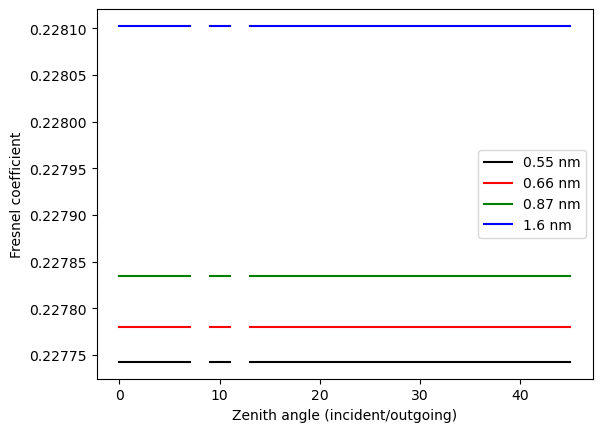

In [42]:
# Visualize the results
import matplotlib.pyplot as plt

# Visualize as black, red, green, blue
colors = ['black', 'red', 'green', 'blue']

for i in range(len(wavelengths)):
    wavelength = wavelengths[i]
    color = colors[i]
    zenith_in_deg = [np.degrees(zenith) for zenith in zenith_vs]

    plt.plot(zenith_in_deg, [fresnel_result[wavelength][zenith] for zenith in zenith_vs], label=f'{wavelength} nm', color=color)

plt.xlabel('Zenith angle (incident/outgoing)')
plt.ylabel('Fresnel coefficient')
plt.legend()
plt.show()
